# Web Scraping Project :- Bike DataSet

### imporrt necessary libraries

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
import re

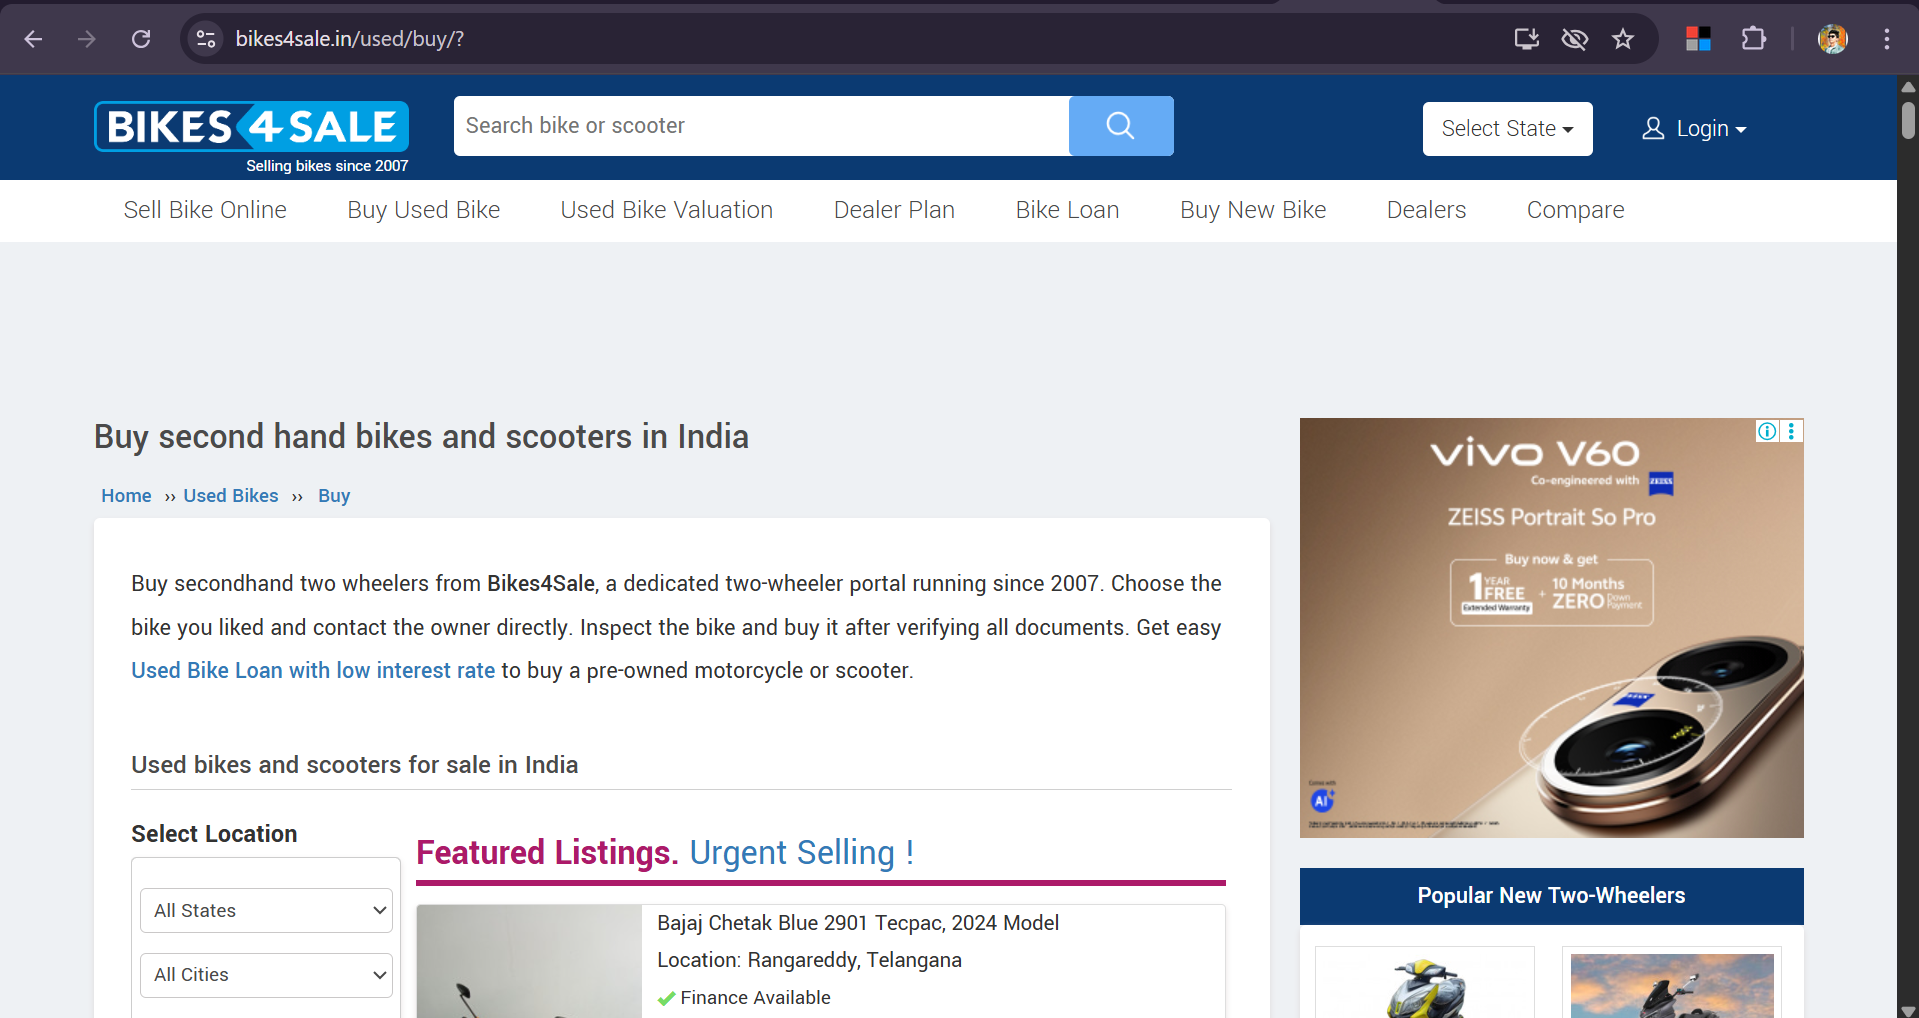

### Identifying the url.
### Loading the webpage using request library.

In [2]:
url = 'https://www.bikes4sale.in/used/buy/?'
web = requests.get(url)
web

<Response [200]>

### Extracting the html content.

In [3]:
web.status_code

200

### check the status code of the page.

In [4]:
html_code = web.text

In [5]:
html_code[:2000]

'<!DOCTYPE html>\n<html lang="en" itemscope itemtype="https://schema.org/WebPage">\n<head>\n<meta charset="utf-8">\n<link rel="shortcut icon" href="/favicon-192x192.png">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<link rel="manifest" href="/manifest.json">\n<link rel="icon" type="image/png" sizes="192x192" href="/favicon-192x192.png">\n<link rel="apple-touch-icon" sizes="57x57" href="/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/apple-icon-72x72.png">\n<link rel="apple-touch-icon" sizes="76x76" href="/apple-icon-76x76.png">\n<link rel="apple-touch-icon" sizes="114x114" href="/apple-icon-114x114.png">\n<link rel="apple-touch-icon" sizes="120x120" href="/apple-icon-120x120.png">\n<link rel="apple-touch-icon" sizes="144x144" href="/apple-icon-144x144.png">\n<link rel="apple-touch-icon" sizes="152x152" href="/apple-icon-152x152.png">\n<link rel="apple-touch-ic

### Parsing with BeautifulSoup.

In [6]:
soup = BeautifulSoup(html_code)

In [7]:
soup.text[:2000]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nUsed bikes and scooters in India. Buy from Owners and Dealers - Bikes4Sale\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSelling bikes since 2007\n\n\n\nSelect State \n\n\n\n\n\n Login \n\nLogin\nSign Up\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSelect State \n\n Login \n\nLogin\nSign Up\n\n\n\n\n\n\nSell Bike Online\n\nBuy Used Bike\n\nAll Used Bikes\nSuperbikes & Imported Bikes\nAuction Bikes\nUsed Cycles\n\n\nUsed Bike Valuation\nUsed Bike Dealer Plan\n\nBike Loan\n\nLoan for Buying Used Bikes\nLoan for Buying New Bikes\nLoan Against Bikes\nEMI Calculator\n\n\n\nBuy New Bike\n\nMotorcycles\nScooters\nATV\nMopeds\nElectric\n\n\n\nDealers\n\nNew Bike Dealers\nUsed Bike Dealers\nRent a Bike\n\n\nCompare\nTips\n\n\n\n\n\n\n\n\n\n\nSell Bike\nBuy Used Bike\nValuation\nDealer Plan\nNew Bikes\nLoan\n\n\n\n\n\n\n\n\n\n\nSell Bike Online\n\nBuy Used Bike\n\nAll Used Bikes\nSuperbikes\nAuction Bikes\nUsed Cycles\n\n\nUsed Bike Valuation\nDealer P

# Extracting the content.

In [8]:
Name = soup.find('div', attrs={'class':'txtBox'})
Name.text

'\n          Yamaha FZ-S FI V2, 2017 ModelLocation: Mhow, Indore, Madhya PradeshRs. 40,000\n\n Finance Available \n            \n\nView More Details\n'

In [9]:
Name = soup.find_all('div', attrs={'class':'boxRow'})
for h in Name:
    print(h.text.strip())

Yamaha FZ-S FI V2, 2017 ModelLocation: Mhow, Indore, Madhya PradeshRs. 40,000

 Finance Available 
            

View More Details
Revolt RV400 Eclipse Red, 2024 ModelLocation: Surat, GujaratRs. 1,20,000

 Finance Available 
            

View More Details
Royal Enfield Interceptor 650 Twin, 2022 ModelLocation: Huzur, Bhopal, Madhya PradeshRs. 2,70,000

 Finance Available 
            

View More Details
Honda Activa 125, 2015 ModelLocation: Bardhaman, West BengalRs. 40,000

 Finance Available 
            

View More Details
Royal Enfield Bullet Standard 500, 2013 ModelLocation: Hadapsar, Pune, MaharashtraRs. 1,20,000

 Finance Available 
            

View More Details
Hero Passion Pro i3s, 2020 ModelLocation: Anand, GujaratRs. 49,000

 Finance Available 
            

View More Details
Harley Davidson X440 S, 2023 ModelLocation: Shaikpet, Hyderabad, TelanganaRs. 3,50,000

 Finance Available 
            

View More Details
Bajaj Pulsar RS 200 ABS, 2019 ModelLocation: Mumbai, Maharas

In [10]:
len(Name)

69

# Iterating the websights

In [2]:
url = 'https://www.bikes4sale.in/used/buy/?page=1'

for i in range(1,11):
    print(f'https://www.bikes4sale.in/used/buy/?page={i}')

https://www.bikes4sale.in/used/buy/?page=1
https://www.bikes4sale.in/used/buy/?page=2
https://www.bikes4sale.in/used/buy/?page=3
https://www.bikes4sale.in/used/buy/?page=4
https://www.bikes4sale.in/used/buy/?page=5
https://www.bikes4sale.in/used/buy/?page=6
https://www.bikes4sale.in/used/buy/?page=7
https://www.bikes4sale.in/used/buy/?page=8
https://www.bikes4sale.in/used/buy/?page=9
https://www.bikes4sale.in/used/buy/?page=10


### Iterate over each page scrape the data again (with correct way)

In [14]:
Title = []

for i in range(1,20):
    url = f'https://www.bikes4sale.in/used/buy/?page={i}'

    response = requests.get(url)
    html_code = response.text

    soup = BeautifulSoup(html_code, "html.parser")
    
    Name = soup.find_all('div', attrs={'class':'boxRow'})
    for h in Name:
        Title.append(h.text.strip())

In [15]:
len(Title)

790

In [16]:
# creating the DataFrame
df = pd.DataFrame({"Bike Name":Title})
df

,Bike Name
0,"Ola S1 Pro, 2023 ModelLocation: Thanabhawan, S..."
1,"Royal Enfield Hunter 350 Metro, 2023 ModelLoca..."
2,"KTM RC 200, 2023 ModelLocation: Tirupati, Chit..."
3,"Jawa forty two, 2022 ModelLocation: Vadodara, ..."
4,"Honda CBR 250R, 2014 ModelLocation: Noida, Utt..."
...,...
785,"KTM 390 Adventure 2023, 2023 ModelLocation: Ne..."
786,"TVS Apache RTR 160, 2010 ModelLocation: Gurgao..."
787,"Royal Enfield Thunderbird X 350, 2018 ModelLoc..."
788,"BMW G 310 RR, 2024 ModelLocation: Jaipur, Raja..."


### Iterate over each page scrape the data again (with correct way)

In [17]:
# Storage lists
bikes = [] 
years = [] 
locations = []
prices = [] 
finance = []

# Load your Excel file
raw_data = df

# Assuming the scraped text is inside the first column
text_data = raw_data.iloc[:, 0].astype(str).tolist()


for entry in text_data:
    # Extract Bike Name + Year
    bike_match = re.match(r"(.+),\s*(\d{4}) Model", entry)
    if bike_match:
        bikes.append(bike_match.group(1).strip())
        years.append(bike_match.group(2))
    else:
        bikes.append(None)
        years.append(None)

    # Extract Location
    loc_match = re.search(r"Location:\s*(.+?)Rs\.", entry)
    if loc_match:
        locations.append(loc_match.group(1).strip())
    else:
        locations.append(None)

    # Extract Price
    price_match = re.search(r"Rs\.\s*([\d,]+)", entry)
    if price_match:
        prices.append(price_match.group(1).replace(",", ""))
    else:
        prices.append(None)

    # Check Finance Available
    if "Finance Available" in entry:
        finance.append("Yes")
    else:
        finance.append("No")

# Build DataFrame
df = pd.DataFrame({
    "Bike Model": bikes,
    "Model Year": years,
    "Location": locations,
    "Price (Rs)": prices,
    "Finance_Available(Yes/No)": finance
})

df.head()

,Bike Model,Model Year,Location,Price (Rs),Finance_Available(Yes/No)
0,Ola S1 Pro,2023,"Thanabhawan, Shamli, Uttar Pradesh",80000,Yes
1,Royal Enfield Hunter 350 Metro,2023,"Gurgaon, Haryana",150000,Yes
2,KTM RC 200,2023,"Tirupati, Chittoor, Andhra Pradesh",120000,Yes
3,Jawa forty two,2022,"Vadodara, Gujarat",150000,Yes
4,Honda CBR 250R,2014,"Noida, Uttar Pradesh",70000,Yes


In [110]:
df.to_csv("Bike.csv",index = False)

In [18]:
# detect the Duplicates in the df
df.duplicated().sum()

32

# Split Location column into City and State

In [19]:
df[['City', 'State']] = df['Location'].str.rsplit(",",n=1, expand=True)

In [20]:
df

,Bike Model,Model Year,Location,Price (Rs),Finance_Available(Yes/No),City,State
0,Ola S1 Pro,2023,"Thanabhawan, Shamli, Uttar Pradesh",80000,Yes,"Thanabhawan, Shamli",Uttar Pradesh
1,Royal Enfield Hunter 350 Metro,2023,"Gurgaon, Haryana",150000,Yes,Gurgaon,Haryana
2,KTM RC 200,2023,"Tirupati, Chittoor, Andhra Pradesh",120000,Yes,"Tirupati, Chittoor",Andhra Pradesh
3,Jawa forty two,2022,"Vadodara, Gujarat",150000,Yes,Vadodara,Gujarat
4,Honda CBR 250R,2014,"Noida, Uttar Pradesh",70000,Yes,Noida,Uttar Pradesh
...,...,...,...,...,...,...,...
785,KTM 390 Adventure 2023,2023,"New Delhi, Delhi",300000,Yes,New Delhi,Delhi
786,TVS Apache RTR 160,2010,"Gurgaon, Haryana",40000,Yes,Gurgaon,Haryana
787,Royal Enfield Thunderbird X 350,2018,"Bettiah, West Champaran, Bihar",125000,Yes,"Bettiah, West Champaran",Bihar
788,BMW G 310 RR,2024,"Jaipur, Rajasthan",285000,Yes,Jaipur,Rajasthan


In [21]:
# Drop the Duplicates 
df = df.drop_duplicates().reset_index(drop=True)

In [22]:
# Drop the Location column
df.drop(columns=['Location'], inplace=True)

In [23]:
df

,Bike Model,Model Year,Price (Rs),Finance_Available(Yes/No),City,State
0,Ola S1 Pro,2023,80000,Yes,"Thanabhawan, Shamli",Uttar Pradesh
1,Royal Enfield Hunter 350 Metro,2023,150000,Yes,Gurgaon,Haryana
2,KTM RC 200,2023,120000,Yes,"Tirupati, Chittoor",Andhra Pradesh
3,Jawa forty two,2022,150000,Yes,Vadodara,Gujarat
4,Honda CBR 250R,2014,70000,Yes,Noida,Uttar Pradesh
...,...,...,...,...,...,...
753,KTM 390 Adventure 2023,2023,300000,Yes,New Delhi,Delhi
754,TVS Apache RTR 160,2010,40000,Yes,Gurgaon,Haryana
755,Royal Enfield Thunderbird X 350,2018,125000,Yes,"Bettiah, West Champaran",Bihar
756,BMW G 310 RR,2024,285000,Yes,Jaipur,Rajasthan


In [24]:
# Find the null values in the dataframe
df.isna().sum()

Bike Model                   21
Model Year                   21
Price (Rs)                   25
Finance_Available(Yes/No)     0
City                         25
State                        43
dtype: int64

In [25]:
# Drop the null values
df= df.dropna()

In [26]:
# Checking is there ay null values are remaining
df.isna().sum()

Bike Model                   0
Model Year                   0
Price (Rs)                   0
Finance_Available(Yes/No)    0
City                         0
State                        0
dtype: int64

In [27]:
df

,Bike Model,Model Year,Price (Rs),Finance_Available(Yes/No),City,State
0,Ola S1 Pro,2023,80000,Yes,"Thanabhawan, Shamli",Uttar Pradesh
1,Royal Enfield Hunter 350 Metro,2023,150000,Yes,Gurgaon,Haryana
2,KTM RC 200,2023,120000,Yes,"Tirupati, Chittoor",Andhra Pradesh
3,Jawa forty two,2022,150000,Yes,Vadodara,Gujarat
4,Honda CBR 250R,2014,70000,Yes,Noida,Uttar Pradesh
...,...,...,...,...,...,...
753,KTM 390 Adventure 2023,2023,300000,Yes,New Delhi,Delhi
754,TVS Apache RTR 160,2010,40000,Yes,Gurgaon,Haryana
755,Royal Enfield Thunderbird X 350,2018,125000,Yes,"Bettiah, West Champaran",Bihar
756,BMW G 310 RR,2024,285000,Yes,Jaipur,Rajasthan


### Creating the Column Company

In [121]:
df['Company'] = df['Bike Model'].str.extract(r'^(\w+)')

C:\Users\nikhi\AppData\Local\Temp\ipykernel_2752\267582957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company'] = df['Bike Model'].str.extract(r'^(\w+)')


In [122]:
df

,Bike Model,Model Year,Price (Rs),Finance_Available(Yes/No),City,State,Company
0,Honda XBlade,2018,54000,Yes,Kolkata,West Bengal,Honda
1,Honda SP125,2023,88000,Yes,Indore,Madhya Pradesh,Honda
2,Jawa 42 Bobber Black Mirror,2023,210000,Yes,Ghaziabad,Uttar Pradesh,Jawa
3,Suzuki V-Strom SX,2023,178000,Yes,Ahmedabad,Gujarat,Suzuki
4,Hero Xtreme 200R,2019,50000,Yes,Gurgaon,Haryana,Hero
...,...,...,...,...,...,...,...
754,Yezdi Roadster Dark,2022,150000,Yes,Guwahati,Assam,Yezdi
755,Yamaha YZF R15 V3,2019,108000,Yes,Madurai,Tamil Nadu,Yamaha
756,Yamaha FZS 25 BS6,2021,115000,Yes,"Dadar, Mumbai",Maharashtra,Yamaha
757,TVS Apache RTR 160 4V 2024,2024,120000,Yes,"Narkatiaganj, West Champaran",Bihar,TVS


In [123]:
# Find the Unique in the column Company.
df['Company'].unique()

array(['Honda', 'Jawa', 'Suzuki', 'Hero', 'Bajaj', 'Ola', 'KTM', 'Yamaha',
       'TVS', 'Royal', 'UM', 'Ather', 'Avon', 'Keeway', 'Husqvarna',
       'Vida', 'Revolt', 'BMW', 'Ronflant', 'Kawasaki', 'Yezdi',
       'Aprilia', 'Evtric', 'Triumph', 'KOMAKI', 'Vespa', 'Harley',
       'Vier', 'Ducati', 'Benelli', 'Okinawa', 'Bicycle', 'BGauss',
       'Mahindra', 'Ampere', 'Pure'], dtype=object)

In [124]:
# Replacing the company name 'Royal' to 'Royal Enfield'.
df['Company'] = df['Company'].replace("Royal","Royal Enfield")

C:\Users\nikhi\AppData\Local\Temp\ipykernel_2752\2077373358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company'] = df['Company'].replace("Royal","Royal Enfield")


In [125]:
# Move "Company" to the first column
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index("Company")))
df = df[cols]

In [126]:
df.to_csv("Bike_DataSet.csv",index = False)

In [127]:
df

,Company,Bike Model,Model Year,Price (Rs),Finance_Available(Yes/No),City,State
0,Honda,Honda XBlade,2018,54000,Yes,Kolkata,West Bengal
1,Honda,Honda SP125,2023,88000,Yes,Indore,Madhya Pradesh
2,Jawa,Jawa 42 Bobber Black Mirror,2023,210000,Yes,Ghaziabad,Uttar Pradesh
3,Suzuki,Suzuki V-Strom SX,2023,178000,Yes,Ahmedabad,Gujarat
4,Hero,Hero Xtreme 200R,2019,50000,Yes,Gurgaon,Haryana
...,...,...,...,...,...,...,...
754,Yezdi,Yezdi Roadster Dark,2022,150000,Yes,Guwahati,Assam
755,Yamaha,Yamaha YZF R15 V3,2019,108000,Yes,Madurai,Tamil Nadu
756,Yamaha,Yamaha FZS 25 BS6,2021,115000,Yes,"Dadar, Mumbai",Maharashtra
757,TVS,TVS Apache RTR 160 4V 2024,2024,120000,Yes,"Narkatiaganj, West Champaran",Bihar


### Check the Data Types of the columns.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 758
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company                    715 non-null    object
 1   Bike Model                 715 non-null    object
 2   Model Year                 715 non-null    object
 3   Price (Rs)                 715 non-null    object
 4   Finance_Available(Yes/No)  715 non-null    object
 5   City                       715 non-null    object
 6   State                      715 non-null    object
dtypes: object(7)
memory usage: 44.7+ KB


### Changing the Data Types of the columns 

In [129]:
df = df.convert_dtypes()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 758
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company                    715 non-null    string
 1   Bike Model                 715 non-null    string
 2   Model Year                 715 non-null    string
 3   Price (Rs)                 715 non-null    string
 4   Finance_Available(Yes/No)  715 non-null    string
 5   City                       715 non-null    string
 6   State                      715 non-null    string
dtypes: string(7)
memory usage: 44.7 KB


In [131]:
df.duplicated().sum()

0

In [132]:
df.isna().sum()

Company                      0
Bike Model                   0
Model Year                   0
Price (Rs)                   0
Finance_Available(Yes/No)    0
City                         0
State                        0
dtype: int64

In [133]:
df.nunique()

Company                       36
Bike Model                   379
Model Year                    21
Price (Rs)                   146
Finance_Available(Yes/No)      2
City                         321
State                         27
dtype: int64